In [0]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [0]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [0]:
train_data -= mean
train_data /= std

test_data -= mean
test_data /= mean

In [54]:
train_data.shape

(404, 13)

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [41]:
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 80
all_scores = []
all_mae_histories = []

for i in range(k):
  print("Fold number ", i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0,validation_data=(val_data, val_targets))
  all_mae_histories.append(history.history['val_mean_absolute_error'])

Fold number  0
Fold number  1
Fold number  2
Fold number  3


In [42]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

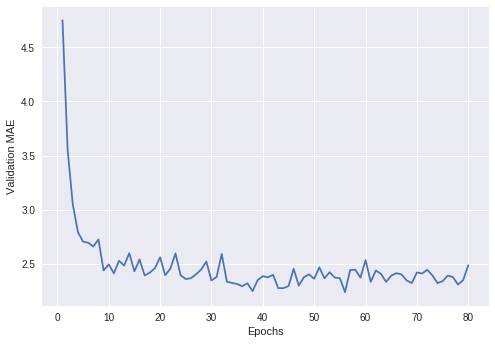

In [44]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [0]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

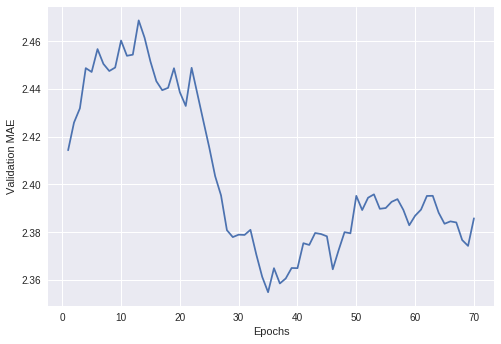

In [47]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [48]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 92us/step


In [49]:
test_mae_score

7.678682402068493